# Compare uncertainties from PAS version and updated framework

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.10/04


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")



In [3]:
# Note : The old numbering scheme starts from 0, new starts from 1

oldfile = ROOT.TFile('mcvariations_softdrop_PAS_7.root')
newfile = ROOT.TFile('mcvariations_softdrop_7.root')

In [4]:
sysvars = ['jec', 'jer', 'jmr', 'jms', 'pu', 'lum', 'pdf', 'ps', 'stat']

In [5]:
c_old = oldfile.Get("cdist7SD")

hists_old = dict( zip( sysvars , [
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jes').Clone(),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jer').Clone(),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jmr').Clone(),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jmr').Clone(),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_pu').Clone(),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_stat').Clone(),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_pdf').Clone(),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_ps').Clone(),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_stat').Clone(),    
]))

In [6]:
c_new = newfile.Get("cdist7SD")

hists_new = dict( zip( sysvars , [
    c_new.GetPrimitive('mcvariations_softdrop_jes').Clone(),
    c_new.GetPrimitive('mcvariations_softdrop_jer').Clone(),
    c_new.GetPrimitive('mcvariations_softdrop_jmr').Clone(),
    c_new.GetPrimitive('mcvariations_softdrop_jmr').Clone(),
    c_new.GetPrimitive('mcvariations_softdrop_pu').Clone(),    
    c_new.GetPrimitive('mcvariations_softdrop_stat').Clone(),    
    c_new.GetPrimitive('mcvariations_softdrop_pdf').Clone(),
    c_new.GetPrimitive('mcvariations_softdrop_ps').Clone(),    
    c_new.GetPrimitive('mcvariations_softdrop_stat').Clone(),    
]))

Info in <TCanvas::Print>: png file compare_unc_PAS_paper_jec.png has been created
Info in <TCanvas::Print>: pdf file compare_unc_PAS_paper_jec.pdf has been created
Info in <TCanvas::Print>: png file compare_unc_PAS_paper_jer.png has been created
Info in <TCanvas::Print>: pdf file compare_unc_PAS_paper_jer.pdf has been created
Info in <TCanvas::Print>: png file compare_unc_PAS_paper_jmr.png has been created
Info in <TCanvas::Print>: pdf file compare_unc_PAS_paper_jmr.pdf has been created
Info in <TCanvas::Print>: png file compare_unc_PAS_paper_jms.png has been created
Info in <TCanvas::Print>: pdf file compare_unc_PAS_paper_jms.pdf has been created
Info in <TCanvas::Print>: png file compare_unc_PAS_paper_pu.png has been created
Info in <TCanvas::Print>: pdf file compare_unc_PAS_paper_pu.pdf has been created
Info in <TCanvas::Print>: png file compare_unc_PAS_paper_lum.png has been created
Info in <TCanvas::Print>: pdf file compare_unc_PAS_paper_lum.pdf has been created
Info in <TCanvas::

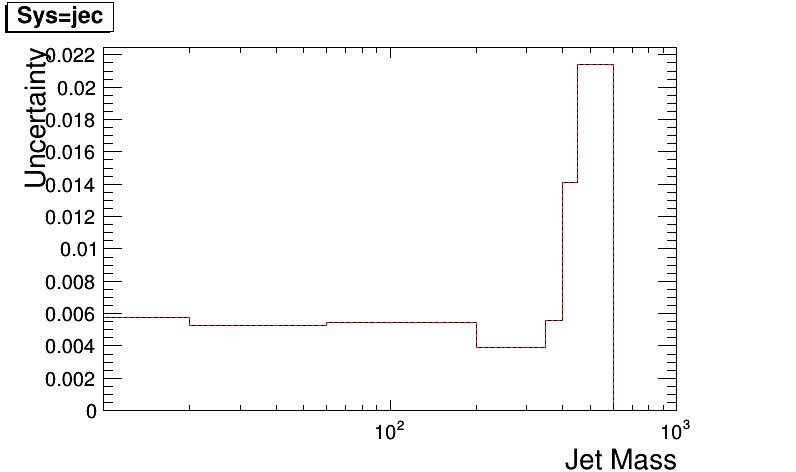

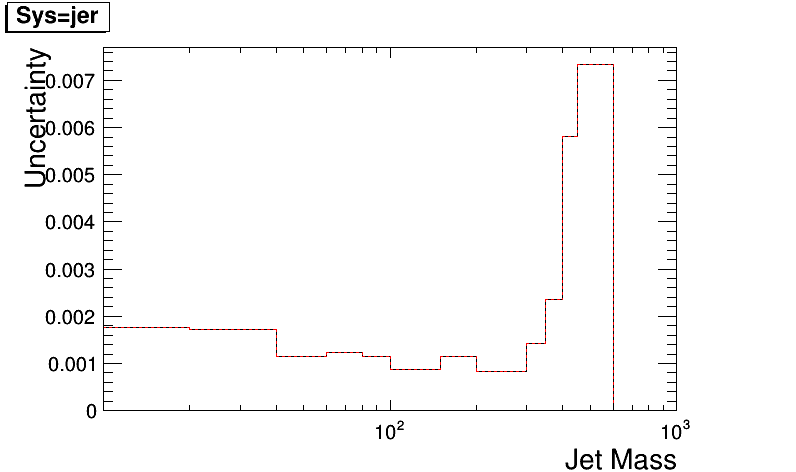

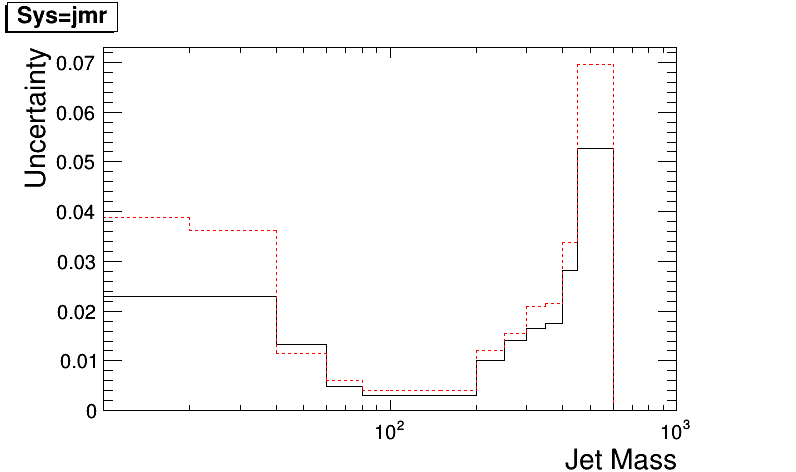

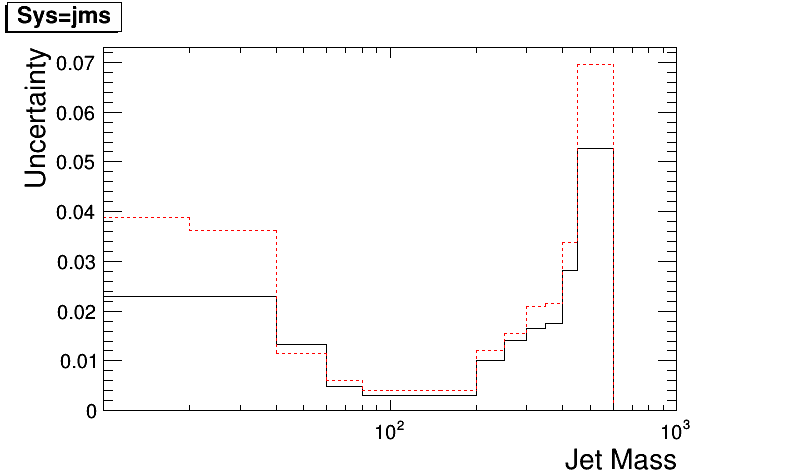

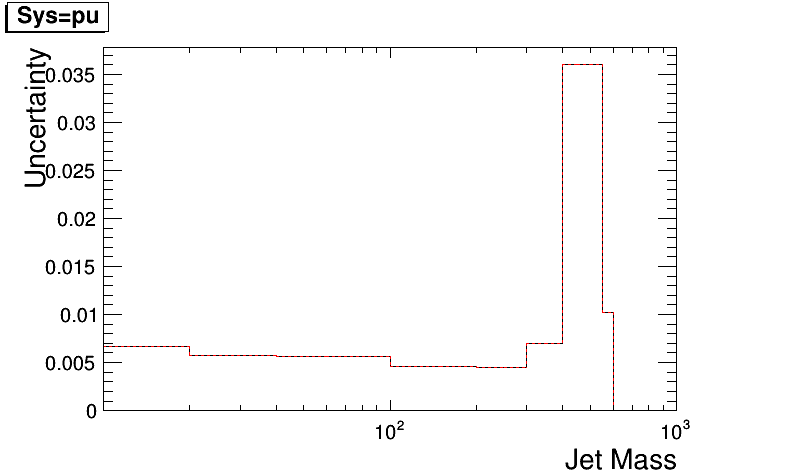

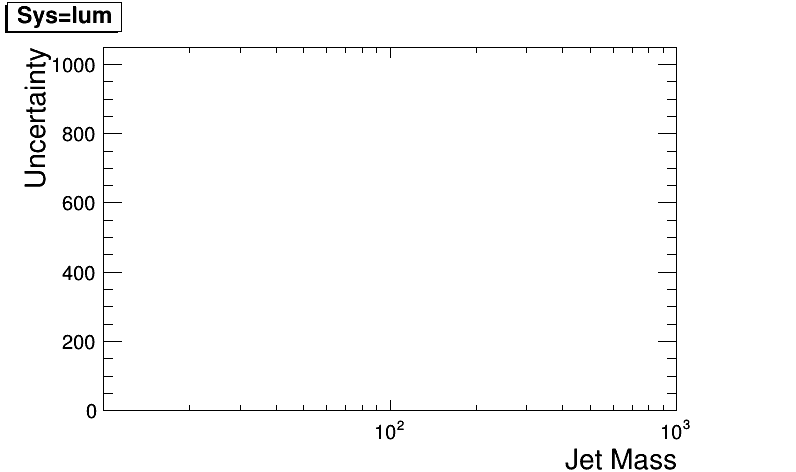

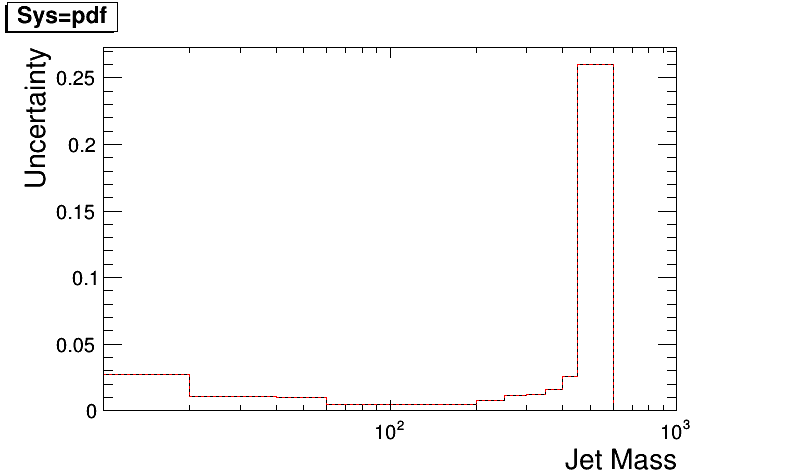

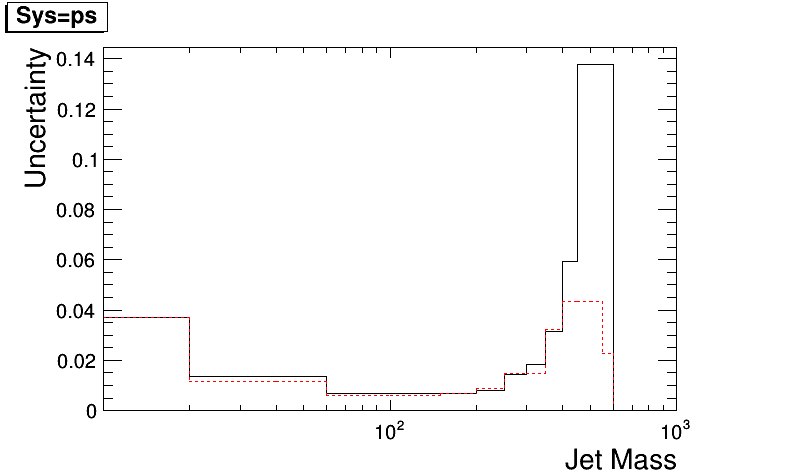

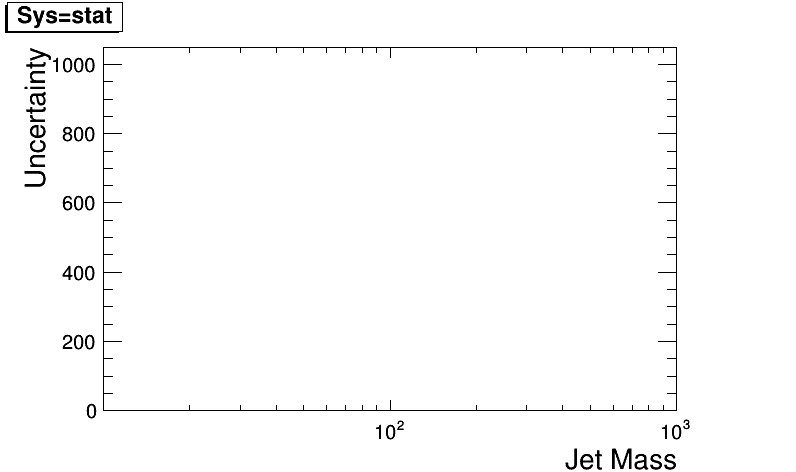

In [7]:
canvs = []
stacks = []

for isys in sysvars :
    c = ROOT.TCanvas("canv_" + isys, "canv_" + isys)
    s = ROOT.THStack("stack_" + isys, 'Sys=' + isys + ';Jet Mass;Uncertainty')
    hold = hists_old[isys]
    hnew = hists_new[isys]
    hold.SetLineStyle(1)
    hold.SetLineColor(1)
    hnew.SetLineStyle(2)
    hnew.SetLineColor(2)
    s.Add(hold)
    s.Add(hnew)
    s.Draw("nostack hist")
    s.GetXaxis().SetRangeUser(10.,1000.)
    c.SetLogx()
    c.Draw()    
    c.Print("compare_unc_PAS_paper_" + isys + ".png", "png")
    c.Print("compare_unc_PAS_paper_" + isys + ".pdf", "pdf")
    canvs.append(c)
    stacks.append(s)    